# Case 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

1. Create a new factor variable in the dataset with two levels - "weekday" and "weekend" indicating whether a given date is a weekday or weekend day.

In [2]:
df = pd.read_csv("activity.csv", parse_dates=["date"])
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["day of week"] = df["date"].dt.dayofweek
df["type of day"] = np.where(df["day of week"] < 6, "weekday", "weekend")
df 



,steps,date,interval,day of week,type of day
0,NaN,2012-10-01,0,0,weekday
1,NaN,2012-10-01,5,0,weekday
2,NaN,2012-10-01,10,0,weekday
3,NaN,2012-10-01,15,0,weekday
4,NaN,2012-10-01,20,0,weekday
...,...,...,...,...,...
17563,NaN,2012-11-30,2335,4,weekday
17564,NaN,2012-11-30,2340,4,weekday
17565,NaN,2012-11-30,2345,4,weekday
17566,NaN,2012-11-30,2350,4,weekday


Replace NaN with 0

In [3]:
df["steps"] = df["steps"].replace(np.nan, 0)
df

,steps,date,interval,day of week,type of day
0,0.0,2012-10-01,0,0,weekday
1,0.0,2012-10-01,5,0,weekday
2,0.0,2012-10-01,10,0,weekday
3,0.0,2012-10-01,15,0,weekday
4,0.0,2012-10-01,20,0,weekday
...,...,...,...,...,...
17563,0.0,2012-11-30,2335,4,weekday
17564,0.0,2012-11-30,2340,4,weekday
17565,0.0,2012-11-30,2345,4,weekday
17566,0.0,2012-11-30,2350,4,weekday


In [4]:
interval_sets = set() # sets of interval
for index, row in df.iterrows():
    interval_sets.add(row["interval"])

In [5]:
interval_mean_weekday = []
interval_mean_weekend = []

for i in sorted(interval_sets):
    interval_mean_weekday.append(df.loc[(df["interval"] == i) & (df["type of day"] == "weekday")]["steps"].mean())
    interval_mean_weekend.append(df.loc[(df["interval"] == i) & (df["type of day"] == "weekend")]["steps"].mean())

2. Make a plot containing a time series plot of the 5-minute
interval (x-axis) and the average number of steps taken, averaged across all weekdays or weekend days (y-axis)

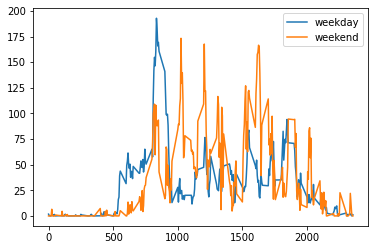

In [10]:
plt.plot(sorted(interval_sets), interval_mean_weekday, label="weekday")
plt.plot(sorted(interval_sets), interval_mean_weekend, label="weekend")
plt.legend()
plt.show()